# Load Required Libraries

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# basic Libraries
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for jupyter notebook widgets
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# for Interactive Shells
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False) # for displaying whole data upon code execution

# Problem Statement
### Perform analysis and Basic Recommendations based on Similar Genres and Movies which Users prefer.

- Some key points to focus are:
-  Profitability of Movies
-  Language based Gross Analysis
-  Comparison of Gross and Profit for different Genres.
-  Recommendation system based on Actors, Movies, Genres.

# What we will do in this Project:

- Treatment of Missing Value using various methods. 
- Perform Feature Engineering
- Manipulate the data according to the requirements
- Perform Recommendations based on content
- Perform Recommendations based on Similarity

# Load and View the dataset

In [4]:
data = pd.read_csv('movie_metadata.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Exploratory Data Analysis (EDA)

In [5]:
# check shape
print(data.shape)

(5043, 28)


In [6]:
# check info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

### Observation:
- Since there are many columns which would not be used to make recommendation, it is better we drop those variables. 

In [7]:
# Remove unnecessary columns from data set using drop() function.
data = data.drop(['color', 
                      'director_facebook_likes', 
                      'actor_3_facebook_likes', 
                      'actor_1_facebook_likes', 
                      'cast_total_facebook_likes', 
                      'actor_2_facebook_likes',  
                      'facenumber_in_poster', 
                      'content_rating', 
                      'country', 
                      'movie_imdb_link', 
                      'aspect_ratio',
                      'plot_keywords',
                      ], axis=1)
data.columns # to see all the columns

Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes'],
      dtype='object')

## Missing Values Imputation
###  Lets check the rows having high Percentage of missing values in the dataset

In [8]:
round((data.isnull().sum() / (len(data.index)) * 100) , 2)

director_name              2.06
num_critic_for_reviews     0.99
duration                   0.30
actor_2_name               0.26
gross                     17.53
genres                     0.00
actor_1_name               0.14
movie_title                0.00
num_voted_users            0.00
actor_3_name               0.46
num_user_for_reviews       0.42
language                   0.24
budget                     9.76
title_year                 2.14
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64

### Observation:
- Since 'gross' and 'budget' columns have large number of NaN values, drop all the rows with NaNs at this column 

In [9]:
# Since 'gross' and 'budget' columns have large number of NaN values, drop all the rows with NaNs at this column using the
# 'isnan' function of NumPy alongwith a negation '~'
data =data[~np.isnan(data['gross'])] # Here we are coding to return 'gross' but without any NA for that we used bitwise operator ~ 
                                    # which returns the opposite of (isnan)
data =data[~np.isnan(data['budget'])] # remove nan from 'budget' (concept : same as above)

# Now lets again check the Missing Values column wise
data.isnull().sum()

director_name              0
num_critic_for_reviews     1
duration                   1
actor_2_name               5
gross                      0
genres                     0
actor_1_name               3
movie_title                0
num_voted_users            0
actor_3_name              10
num_user_for_reviews       0
language                   3
budget                     0
title_year                 0
imdb_score                 0
movie_facebook_likes       0
dtype: int64

In [10]:
# The ROWS for which the sum of Null is less than two are retained
data = data[data.isnull().sum(axis=1) <= 2]
data.isnull().sum()

director_name             0
num_critic_for_reviews    1
duration                  1
actor_2_name              2
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
actor_3_name              7
num_user_for_reviews      0
language                  3
budget                    0
title_year                0
imdb_score                0
movie_facebook_likes      0
dtype: int64

### Observations:
- Here we wrote a program which will count the Null along the different columns for each row and wherever the sum of null are 2 or more it will remove them.
- Hence on the output we observe in REDUCTION of null values BUT they are not reduced to 0. Because we retained the rows with sum of Null less than 2. 


In [11]:
# lets impute the missing values

# using mean for numerical columns
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mean(), inplace = True)
data['duration'].fillna(data['duration'].mean(), inplace = True)

# using mode for categorical column
data['language'].fillna(data['language'].mode()[0], inplace =True) 

# As we know that We cannot use statistical values for imputing the missing values of actor names, so we will replace the 
# actor names with "Unknown Actor"
data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

# as we imputed all the missing values lets check the no. of total missing values in the dataset
data.isnull().sum().sum()

0

### Observations:
- Used Mean to compute missing values in Numerical Columns
- Used Mode for categorical column
- Used STRING ("unknown Actor") where Noun was involved as we cannot guess the name of the actor in that specific movie.

### Finally checked the sum of all missing values and we got 0. Hence all the missing values are computed.

# Feature Engineering
## Calculating Profit of a Movie

### Budget: 
    It is an amount which producers spend to produce a movie which includes the Production, casting and Advertisements cost.
### Gross: 
    It is an amount which Producers earn by releasing their movies in theaters, selling satellite rights to TC, OTT Platforms such as Prime, Hulu, Disney+Hotsar, Netflix etc.
## Profit: 
    Profit = Gross-Budget

## Lets convert the gross and budget from dollars to Million Dollars to make our analysis easier

In [12]:
data['gross'] = data['gross']/1000000
data['budget'] = data['budget']/1000000


In [13]:
data.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,Joel David Moore,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,3054.0,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,169.0,Orlando Bloom,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,1238.0,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,148.0,Rory Kinnear,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,994.0,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,164.0,Christian Bale,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,2701.0,English,250.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,132.0,Samantha Morton,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,738.0,English,263.7,2012.0,6.6,24000


In [14]:
# lets create a Profit column using the Budget and Gross

data['Profit'] = data['gross'] - data['budget']

# lets also check the name of Top 10 Profitable Movies
data[['Profit', 'movie_title']].sort_values(by='Profit', ascending = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
794,403.279547,The Avengers
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight


### Observation:
- We can see duplicates, we can remove the duplicate rows as it will cause repetation of recommendation in the final step.

In [15]:
# By looking at the above result we can easily analyze that there are some duplicate

# lets print the no. of rows before removing Duplicates
print("No. of Rows Before Removing Duplicates: ", data.shape[0])

# so lets remove all the duplicates from the data
data.drop_duplicates(subset=None,keep ='first', inplace =True)

# lets print the no. of rows after removing Duplicates
print("No. of Rows After Removing Duplicates: ",data.shape[0])

No. of Rows Before Removing Duplicates:  3888
No. of Rows After Removing Duplicates:  3853


In [16]:
# Lets check the Top 10 Profitable Movies Again
data[['Profit','movie_title']].sort_values(by = 'Profit', ascending = False).head(10)

,Profit,movie_title
0,523.505847,Avatar
29,502.177271,Jurassic World
26,458.672302,Titanic
3024,449.935665,Star Wars: Episode IV - A New Hope
3080,424.449459,E.T. the Extra-Terrestrial
17,403.279547,The Avengers
509,377.783777,The Lion King
240,359.544677,Star Wars: Episode I - The Phantom Menace
66,348.316061,The Dark Knight
439,329.999255,The Hunger Games


### Manipulating duration and language column

### Insights:
- Language:
        Other languages are very less when compared to English, hence we will change all other languages as Foreign language 
- Duration:
        The Duration of Movies is not varying a lot but we know that most of the users either like watching long movies or short duration movies. we can categorize the movies in two part i.e., short and long.

In [17]:
# lets check the values in the language column
data['language'].value_counts()

English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Dutch            3
Danish           3
Thai             3
Persian          3
Hebrew           3
Aboriginal       2
Dari             2
Indonesian       2
Russian          1
Kazakh           1
Czech            1
Arabic           1
Mongolian        1
Icelandic        1
Filipino         1
Bosnian          1
Romanian         1
None             1
Telugu           1
Dzongkha         1
Maya             1
Aramaic          1
Swedish          1
Zulu             1
Vietnamese       1
Hungarian        1
Name: language, dtype: int64

### Creating a function to change all other languages as Foreign language

In [18]:
def language(x):
    if x == 'English':
        return 'English'
    else:
        return 'Foreign'

# lets apply the function on the language column
data['language'] = data['language'].apply(language)

# lets check the values again
data['language'].value_counts()

English    3673
Foreign     180
Name: language, dtype: int64

### Creating a function to categorize the duration of Movie as $LONG$ and $SHORT$

In [19]:
# lets define a function for categorizing duration of Movie
def duration(x):
    if x >= 120:
        return "Long"
    else: 
        return "Short"
    
# lets apply the function on the duration column
data['duration'] = data['duration'].apply(duration)

# lets check the values of Duration column
data['duration'].value_counts()

Short    2872
Long      981
Name: duration, dtype: int64

### Extracting Movie Genres

In [20]:
# lets also check the values in the Genres Column
data['genres'].value_counts()

Drama                                      153
Comedy|Drama|Romance                       151
Comedy|Drama                               147
Comedy                                     145
Comedy|Romance                             135
                                          ... 
Action|Adventure|Comedy|Crime|Thriller       1
Comedy|Drama|Fantasy|Music|Romance           1
Adventure|Comedy|Horror|Sci-Fi               1
Comedy|Drama|Fantasy|Horror                  1
Action|Adventure|Family|Fantasy|Romance      1
Name: genres, Length: 762, dtype: int64

### Observations:
- We can see from the above output that most of the movies are having a lot of genres.
- Also, a movie can have so many genres, we will keep only top 4 genres of the movie. If they dont have 2nd or 3rd or 4th genre we will use the 1st genre in that place.

In [21]:
data['Moviegenres'] = data['genres'].str.split('|')
data['genre1'] = data['Moviegenres'].apply(lambda x: x[0])

# Some of the movies have only one genre. In such cases, assign the same genre to 'genre_2' as well
data['genre2'] = data['Moviegenres'].apply(lambda x: x[1] if len(x) > 1 else x[0])
data['genre3'] = data['Moviegenres'].apply(lambda x: x[2] if len(x) > 2 else x[0])
data['genre4'] = data['Moviegenres'].apply(lambda x: x[3] if len(x) > 3 else x[0])

# lets check the head of the  data
data[['genres', 'genre1', 'genre2', 'genre3', 'genre4']].head()


,genres,genre1,genre2,genre3,genre4
0,Action|Adventure|Fantasy|Sci-Fi,Action,Adventure,Fantasy,Sci-Fi
1,Action|Adventure|Fantasy,Action,Adventure,Fantasy,Action
2,Action|Adventure|Thriller,Action,Adventure,Thriller,Action
3,Action|Thriller,Action,Thriller,Action,Action
5,Action|Adventure|Sci-Fi,Action,Adventure,Sci-Fi,Action


# Data Visualization
### Top 10 Movies in Social Media
### Calculating social Media Popularity
### Important factors to determine social media popularity includes:
- Number of people who voted for Movie.
- Number of people who reviewed the movie
- Number of Facebook likes on the Movie Page.

### Using the above metrics, we came up with a formula to calculate social media popularity of these movies. 
        (Number of People Reviewed for Movie / No. of people Voted for Movie) * No. Facebook Likes
    
### Note: This is self made formula so its ok if someone uses a different one, provided the mathematical logic is not compromised.

In [22]:
data.columns


Index(['director_name', 'num_critic_for_reviews', 'duration', 'actor_2_name',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'actor_3_name', 'num_user_for_reviews', 'language', 'budget',
       'title_year', 'imdb_score', 'movie_facebook_likes', 'Profit',
       'Moviegenres', 'genre1', 'genre2', 'genre3', 'genre4'],
      dtype='object')

### Lets also calculate the Social Media Popularity of a Movie 

In [23]:
# to calculate popularity of a movie, we can aggregate No. of voted users, No. of Users for Reviews, and Facebook Likes.
data['Social_Media_Popularity'] = ((data['num_user_for_reviews']/data['num_voted_users'])* (data['movie_facebook_likes']))



### Lets also check the Top 10 Most Popular Movies on Social Media

   index                          movie_title  Social_Media_Popularity
0     10  Batman v Superman: Dawn of Justice               1599.794424
1    150                        Ghostbusters               1076.336425
2   1582                        Ghostbusters               1075.827482
3     96                        Interstellar               1024.560802
4   3015               10 Days in a Madhouse                828.025478
5    945                      Into the Woods                692.937200
6     73                       Suicide Squad                652.816996
7   1190                Fifty Shades of Grey                624.306881
8    108                            Warcraft                622.790277
9     92        Independence Day: Resurgence                599.274128


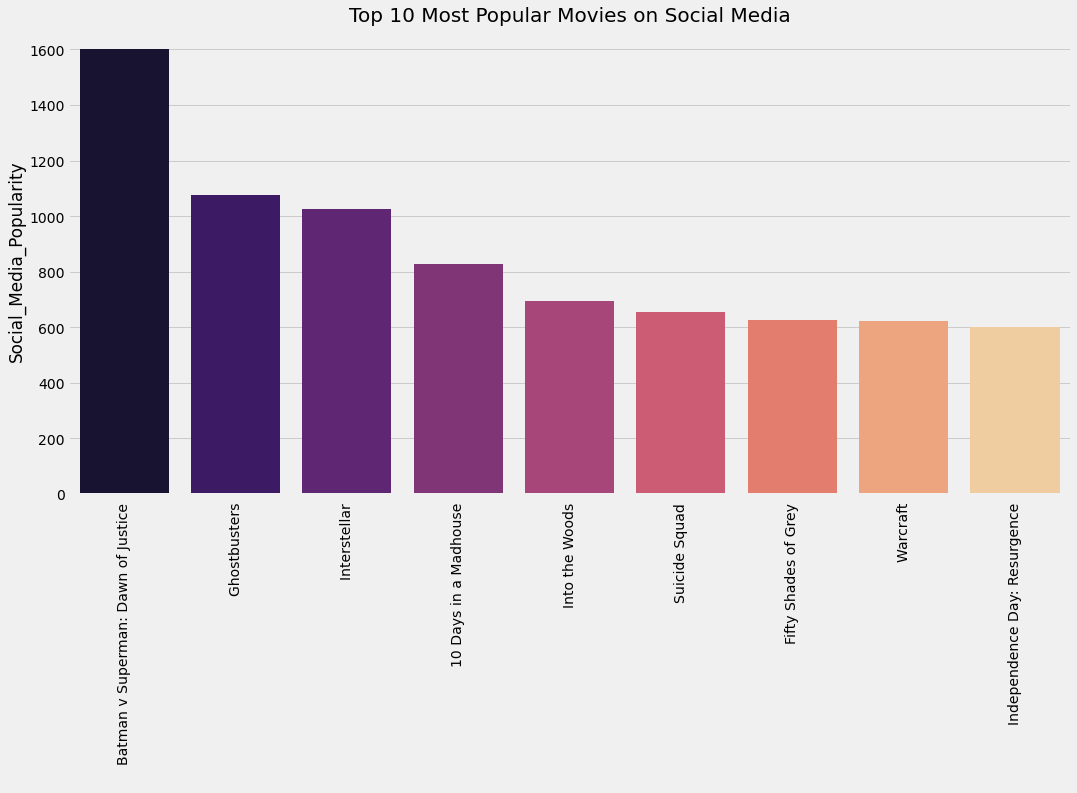

In [24]:
x = data[['movie_title','Social_Media_Popularity']].sort_values(by = 'Social_Media_Popularity',ascending = False).head(10).reset_index()
print(x)

sns.barplot(x['movie_title'], x['Social_Media_Popularity'], palette = 'magma')
plt.title('Top 10 Most Popular Movies on Social Media', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 14)
plt.xlabel(' ')
plt.show()

### Analyzing which genre is more bankable

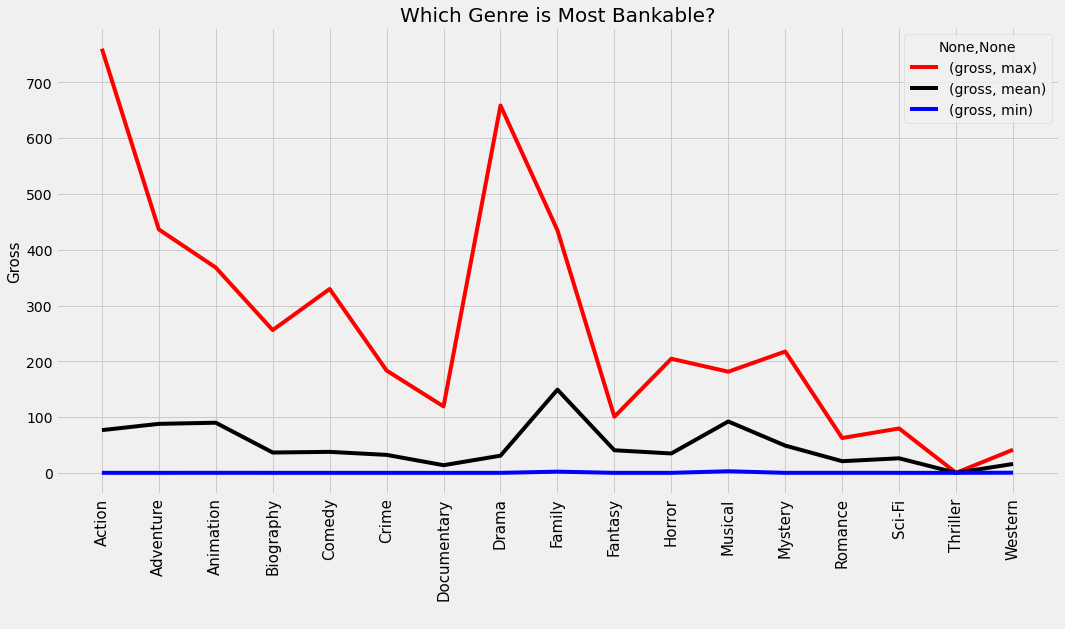

The Most Profitable Movie from each Genre


,genre1,movie_title,gross
0,Action,Avatar,760.505847
509,Adventure,The Lion King,422.783777
521,Animation,Despicable Me 2,368.049635
1403,Biography,The Blind Side,255.950375
836,Comedy,Forrest Gump,329.691196
3466,Crime,The Godfather,134.821952
3583,Documentary,Fahrenheit 9/11,119.078393
26,Drama,Titanic,658.672302
3080,Family,E.T. the Extra-Terrestrial,434.949459
2485,Fantasy,The Others,96.471845


In [25]:
# Lets compare the Gross with Genres

# first group the genres and get max, min, and avg gross of the movies of that genre.
display(data[['genre1', 'gross']].groupby(['genre1']).agg(['max','mean','min']).style.background_gradient(cmap='Wistia'))

# lets plot these values using lineplot
data[['genre1', 'gross']].groupby(['genre1']).agg(['max','mean','min']).plot(kind= 'line', color = ['red','black', 'blue'])
#give title  to the plot
plt.title("Which Genre is Most Bankable?", fontsize = 20)
# set xticks 
plt.xticks(np.arange(17), ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western'], rotation = 90, fontsize = 15)
#set x and y labels
plt.ylabel("Gross", fontsize= 15)
plt.xlabel(" ")
#plot the final chart
plt.show()

print('The Most Profitable Movie from each Genre')
display(data.loc[data.groupby(data['genre1'])['Profit'].idxmax()][['genre1',
                                    'movie_title','gross']].style.background_gradient(cmap = 'copper'))

### Observations:
- Most Bankable genre is Action, Drama, Adventure
- Genre with least Gross Value is Thriller
- Most Profitable Movie from Action Genre : Avatar
- Most Profitable Movie from Drama Genre : Titanic
- Most Profitable Movie from Action : The Lion King.
    


### Loss and profit analysis of English and Foreign movies

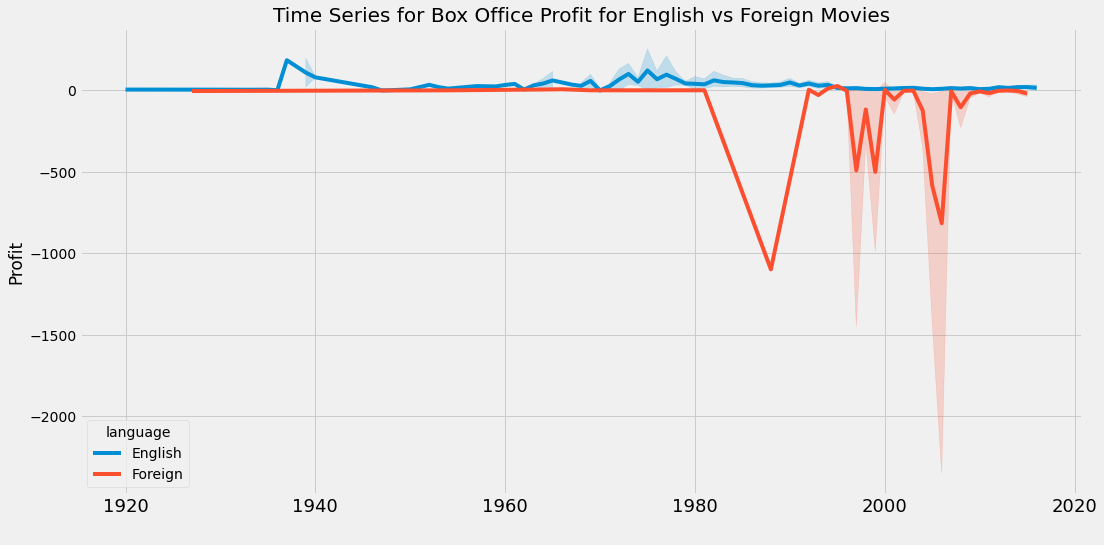

In [26]:
# lets convert year into integer
data['title_year'] = data['title_year'].astype(int)
display(data[['title_year', 'language', 'Profit']].groupby(['language', 'title_year']).agg('sum')
        .sort_values(by= 'Profit', ascending= False).head(10)
        .style.background_gradient(cmap = 'Greens'))

# plot these values
sns.lineplot(data['title_year'], data['Profit'], hue = data['language'])
plt.title("Time Series for Box Office Profit for English vs Foreign Movies", fontsize = 20)
plt.xticks(fontsize = 18)
plt.xlabel(" ")
plt.show()

### Observations:
- Years 2014, 2012, 2015 are the top profitable years.
- English Movies are at the top in terms of Profit 
- Profit of Foreign movies are much less as compared to English Movies
- Time series Plot shows that Foreign movies made huge losses from 1990 to 2000
- English Movies never went losses overall.

In [27]:
# Here we are checking movies that made more than 2000 million Dollars
print("Movies that Made Huge Losses")
display(data[data['Profit'] < -2000][['movie_title', 'language', 'Profit']].style.background_gradient(cmap ="Reds") )

Movies that Made Huge Losses


,movie_title,language,Profit
2323,Princess Mononoke,Foreign,-2397.701809
2334,Steamboy,Foreign,-2127.109510
2988,The Host,Foreign,-12213.298588
3005,Fateless,Foreign,-2499.804112
3859,Lady Vengeance,Foreign,-4199.788333


### Observations:
- Movies that made the Huge losses are all forign moves 
- The Host is the movie which made the highest Loss. 

### Gross Comparison of Long and Short Movies

,movie_title,duration,gross,Profit
0,Avatar,Long,760.505847,523.505847
29,Jurassic World,Long,652.177271,502.177271
26,Titanic,Long,658.672302,458.672302
3024,Star Wars: Episode IV - A New Hope,Long,460.935665,449.935665
3080,E.T. the Extra-Terrestrial,Long,434.949459,424.449459


,movie_title,duration,gross,Profit
509,The Lion King,Short,422.783777,377.783777
812,Deadpool,Short,363.024263,305.024263
521,Despicable Me 2,Short,368.049635,292.049635
338,Finding Nemo,Short,380.838870,286.838870
582,Shrek 2,Short,436.471036,286.471036


Text(0.5, 1.0, 'Gross Comparison')

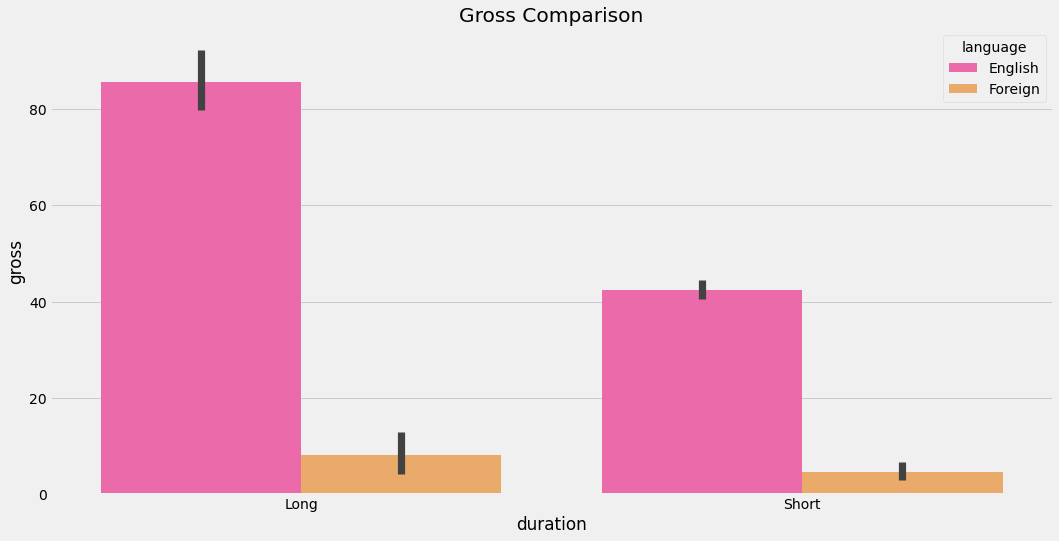

In [28]:
display(data[data['duration'] == 'Long'][['movie_title', 'duration', 'gross', 'Profit']]
        .sort_values(by= 'Profit', ascending =False).head(5).style.background_gradient("spring"))

display(data[data['duration'] == 'Short'][['movie_title', 'duration', 'gross', 'Profit']].sort_values(by = 'Profit', ascending = False)
        .head(5).style.background_gradient("spring"))

sns.barplot(data['duration'], data['gross'], hue= data['language'], palette = 'spring')
plt.title("Gross Comparison")

### Observations:
- Gross and Duration table:
        We see that Gross of Long movies are much more than Short movies, Hence we can say that Long Movies has more BANKING capability.
- Gross and Duration Bar Plot
        Look at the barplot its clear that the gross of English movie will be high if movie is of Long duration and gross will be low if movie is short duration.
        Whereas for foreign movies Gross change is not large in terms of Duration of the movie.

## Association between IMDB rating and Duration

Average IMDB Score for Long Duration Movies is 7.05
Average IMDB Score for Short Duration Movies is 6.26

Highest Rated Long Duration Movie
                     movie_title  imdb_score
1937  The Shawshank Redemption          9.3

Highest Rated Short Duration Movie
         movie_title  imdb_score
4427  Modern Times          8.6


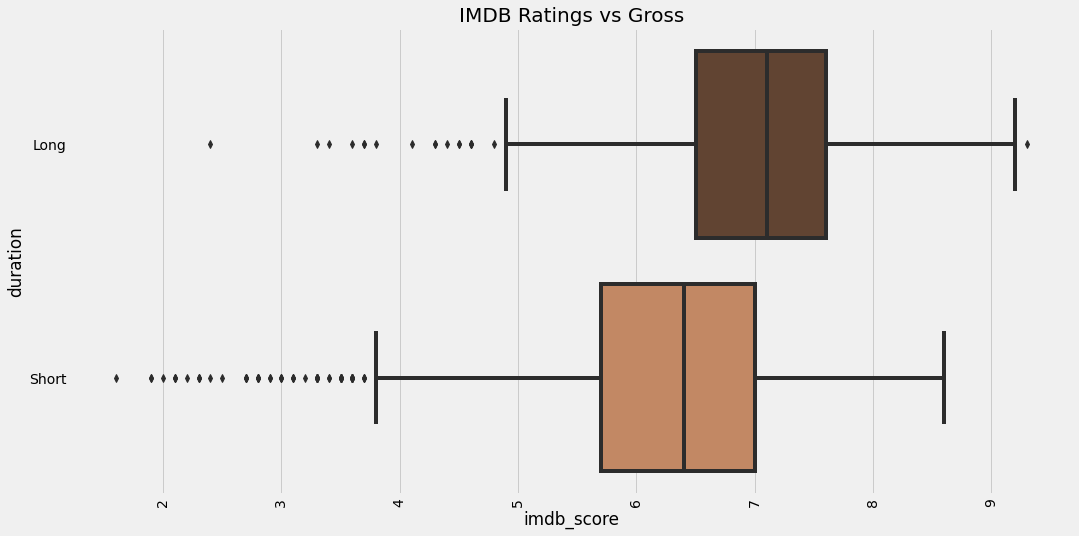

In [29]:
# checking the Avg IMDB score for Long and Short duration movies
print('Average IMDB Score for Long Duration Movies is {0:.2f}'.format(data[data['duration'] == 'Long']['imdb_score'].mean()))
print('Average IMDB Score for Short Duration Movies is {0:.2f}'.format(data[data['duration'] == 'Short']['imdb_score'].mean()))

# checking the highest rated Long duration movie
print('\nHighest Rated Long Duration Movie\n',
     data[data['duration'] == 'Long'][['movie_title','imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))

# checking the highest rated Short duration movie
print('\nHighest Rated Short Duration Movie\n',
     data[data['duration'] == 'Short'][['movie_title', 'imdb_score']].sort_values(by = 'imdb_score', ascending = False).head(1))

#plotting a box plot to see the visualize the above
sns.boxplot(data['imdb_score'], data['duration'], palette = 'copper')
plt.title("IMDB Ratings vs Gross", fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### Observations:
- Average IMDB score of Long Duration movie is more than Short duration movie
- Highest IMDB Rate of Long duration Movie is 9.3
- Highest IMDB Rate of Short duration Movie is 8.6 
- Box plot also Proves that long duration movie has better IMDB rating than short duration movie.

### Long Duration movies has more impact on the box office

### Comparing Critically aclaimed actors

In [30]:
data.head()

,director_name,num_critic_for_reviews,duration,actor_2_name,gross,genres,actor_1_name,movie_title,num_voted_users,actor_3_name,...,title_year,imdb_score,movie_facebook_likes,Profit,Moviegenres,genre1,genre2,genre3,genre4,Social_Media_Popularity
0,James Cameron,723.0,Long,Joel David Moore,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,Wes Studi,...,2009,7.9,33000,523.505847,"[Action, Adventure, Fantasy, Sci-Fi]",Action,Adventure,Fantasy,Sci-Fi,113.723251
1,Gore Verbinski,302.0,Long,Orlando Bloom,309.404152,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,Jack Davenport,...,2007,7.1,0,9.404152,"[Action, Adventure, Fantasy]",Action,Adventure,Fantasy,Action,0.000000
2,Sam Mendes,602.0,Long,Rory Kinnear,200.074175,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,Stephanie Sigman,...,2015,6.8,85000,-44.925825,"[Action, Adventure, Thriller]",Action,Adventure,Thriller,Action,306.269665
3,Christopher Nolan,813.0,Long,Christian Bale,448.130642,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,Joseph Gordon-Levitt,...,2012,8.5,164000,198.130642,"[Action, Thriller]",Action,Thriller,Action,Action,387.092264
5,Andrew Stanton,462.0,Long,Samantha Morton,73.058679,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,Polly Walker,...,2012,6.6,24000,-190.641321,"[Action, Adventure, Sci-Fi]",Action,Adventure,Sci-Fi,Action,83.466853


In [31]:
# We create a function to check the career of actor in the industry.
def query_actors(n):
    a = data[data['actor_1_name'] == n] #return reqd variables if the name is in the list actor_1_name
    b = data[data['actor_2_name'] == n] #return reqd variables if the name is in the list actor_2_name
    c = data[data['actor_3_name'] == n] #return reqd variables if the name is in the list actor_3_name
    # now connecting everything together to get one output
    x = a.append(b)
    y = x.append(c)
    
    #now lets define which all columns we would want to return when this function is executed
    y = y[['movie_title',
       'budget',
       'gross',
       'title_year',
       'genres',
       'language',
       'imdb_score',]]
    
    #finally return y
    return y

In [32]:
query_actors('Meryl Streep')

,movie_title,budget,gross,title_year,genres,language,imdb_score
410,It's Complicated,85.0,112.703470,2009,Comedy|Drama|Romance,English,6.6
1106,The River Wild,45.0,46.815748,1994,Action|Adventure|Crime|Thriller,English,6.3
1204,Julie & Julia,40.0,94.125426,2009,Biography|Drama|Romance,English,7.0
1408,The Devil Wears Prada,35.0,124.732962,2006,Comedy|Drama|Romance,English,6.8
1483,Lions for Lambs,35.0,14.998070,2007,Drama|Thriller|War,English,6.2
1575,Out of Africa,31.0,87.100000,1985,Biography|Drama|Romance,English,7.2
1618,Hope Springs,30.0,63.536011,2012,Comedy|Drama|Romance,English,6.3
1674,One True Thing,30.0,23.209440,1998,Drama,English,7.0
1925,The Hours,25.0,41.597830,2002,Drama|Romance,English,7.6
2781,The Iron Lady,13.0,29.959436,2011,Biography|Drama|History,English,6.4


### Observations:
- Above list is huge and its difficult to understand the performance of the actors
- Another way is to specific the functions when and print more precise information about the actors in question. we call it MAKING REPORTS FOR ACTORS

### Making Reports for Actor
### It would be very interesting if we could create a function which can provide a summary of an actor which should include:
- The time period of Actor
- Minimum Gross Amount
- Average Gross Amount
- Maximum Gross Amount 
- Number of movies that crossed 100 Million mark
- Average IMDB score
- Most Common Genres

In [33]:
# We create a function to check the career of actor in the industry. MORE PRECISE INFO
def actors_report(n):
    a = data[data['actor_1_name'] == n] #return reqd variables if the name is in the list actor_1_name
    b = data[data['actor_2_name'] == n] #return reqd variables if the name is in the list actor_2_name
    c = data[data['actor_3_name'] == n] #return reqd variables if the name is in the list actor_3_name
    # now connecting everything together to get one output
    x = a.append(b)
    y = x.append(c)
    print("Time: {} {}". format((y['title_year'].min()), y['title_year'].max()))
    print("Minimum Gross Amount {0:.2f} Millions".format(y['gross'].min()))
    print("Average Gross Amount {0:.2f} Millions".format(y['gross'].mean()))
    print("Maximum Gross Amount {0:.2f} Millions".format(y['gross'].max()))
    print("Number of Movies crossed 100 Million :", y[y['gross'] > 100].shape[0])
    print("Avg IMDB Score : {0:.2f}".format(y['imdb_score'].mean()))
    print("Most common Genres\n", y['genre1'].value_counts().head())

In [34]:
actors_report('Meryl Streep')

Time: 1985 2014
Minimum Gross Amount 9.66 Millions
Average Gross Amount 55.23 Millions
Maximum Gross Amount 143.70 Millions
Number of Movies crossed 100 Million : 4
Avg IMDB Score : 6.81
Most common Genres
 Drama        9
Comedy       7
Biography    3
Adventure    3
Action       1
Name: genre1, dtype: int64


In [35]:
# Lets compare Brad Pitt, Leonardo DiCaprio and Tom Cruise by 
# creating critically_acclaimed_actors function using num_critic_for_reciews column
def critically_acclaimed_actors(m):
    a = data[data['actor_1_name'] == m]
    b = data[data['actor_2_name'] == m]
    c = data[data['actor_3_name'] == m]
    x = a.append(b)
    y = x.append(c)
    return y['num_critic_for_reviews'].sum().astype('int')

print("Number of Critics Reviews for Brad Pitt")
display(critically_acclaimed_actors('Brad Pitt'))

print("Number of Critics Reviews for Leonardo DiCaprio")
display(critically_acclaimed_actors('Leonardo DiCaprio'))

print("Number of Critics Reviews for Tom Cruise")
display(critically_acclaimed_actors('Tom Cruise'))

Number of Critics Reviews for Brad Pitt


7814

Number of Critics Reviews for Leonardo DiCaprio


7014

Number of Critics Reviews for Tom Cruise


6740

# Interactive Functions 
###  Top Movies based on Gross, and IMDB 

In [36]:
pd.set_option('max_rows', 30000)
@interact
def show_movies_more_than(column='imdb_score', score=data['imdb_score'].mean()):
    x = data.loc[data[column] > score][[ 'title_year','movie_title',
                                       'director_name',
                                       'actor_1_name',
                                       'actor_2_name',
                                       'actor_3_name',
                                       'Profit',
                                       'imdb_score',
                                    ]]
    x = x.sort_values(by = 'imdb_score', ascending = False)
    x = x.drop_duplicates(keep = 'first')
    return x

interactive(children=(Text(value='imdb_score', description='column'), FloatSlider(value=6.463171554632753, des…

In [37]:
pd.set_option('max_rows', 30000)
@interact
def show_articles_more_than(column=['budget','gross'], x=1000):
    return data.loc[data[column] > x][['movie_title','duration','gross','Profit','imdb_score']]

interactive(children=(Dropdown(description='column', options=('budget', 'gross'), value='budget'), IntSlider(v…

# Recommendations
### Recommending Movies based on Languages

In [38]:
# 'language','movie_title','imdb_score'
def recommend_lang(x):
    y = data[['language','movie_title','imdb_score']][data['language'] == x]
    y = y.sort_values(by = 'imdb_score',ascending = False).head(15)
    return y

### Recommended Movies for Foreign Languages

In [39]:
recommend_lang('Foreign')

,language,movie_title,imdb_score
4498,Foreign,"The Good, the Bad and the Ugly",8.9
4029,Foreign,City of God,8.7
4747,Foreign,Seven Samurai,8.7
2373,Foreign,Spirited Away,8.6
4921,Foreign,Children of Heaven,8.5
4259,Foreign,The Lives of Others,8.5
3931,Foreign,Samsara,8.5
4659,Foreign,A Separation,8.4
1329,Foreign,Baahubali: The Beginning,8.4
2970,Foreign,Das Boot,8.4


### Recommended Movies for Foreign Languages

In [40]:
recommend_lang('English')

,language,movie_title,imdb_score
1937,English,The Shawshank Redemption,9.3
3466,English,The Godfather,9.2
2837,English,The Godfather: Part II,9.0
66,English,The Dark Knight,9.0
3355,English,Pulp Fiction,8.9
1874,English,Schindler's List,8.9
339,English,The Lord of the Rings: The Return of the King,8.9
683,English,Fight Club,8.8
270,English,The Lord of the Rings: The Fellowship of the R...,8.8
2051,English,Star Wars: Episode V - The Empire Strikes Back,8.8


### Recommending Movies based on Actors

In [41]:
def recommend_movies_on_actors(n):
    a = data[['movie_title','imdb_score']][data['actor_1_name'] == n]#return only two (reqd) colmn after searching the name in actor_1_name
    b = data[['movie_title','imdb_score']][data['actor_2_name'] == n]#return only two (reqd) colmn after searching the name in actor_2_name
    c = data[['movie_title','imdb_score']][data['actor_3_name'] == n]#return only two (reqd) colmn after searching the name in actor_3_name
    #connect everything
    x = a.append(b)
    y = x.append(c)
    y.sort_values(by= 'imdb_score', ascending = False).head(15)
    return y

### Recommended Movies on Tom Cruise

In [42]:
recommend_movies_on_actors('Tom Cruise')

,movie_title,imdb_score
75,Edge of Tomorrow,7.9
135,Mission: Impossible - Rogue Nation,7.4
155,Mission: Impossible - Ghost Protocol,7.4
158,The Last Samurai,7.7
189,War of the Worlds,6.5
220,Mission: Impossible II,6.1
234,Knight and Day,6.3
284,Minority Report,7.7
370,Valkyrie,7.1
438,Mission: Impossible,7.1


### Recommending Similar Genres and Movies

In [43]:
from mlxtend.preprocessing import TransactionEncoder 
# TransactionEncoder: Encodes database transaction data in form of a Python list of lists into a NumPy array.
# We need all the genres as variables/columns and for that we use TransactionEncoder

x = data['genres'].str.split('|')
te = TransactionEncoder()
x = te.fit_transform(x)
x = pd.DataFrame(x, columns = te.columns_)

x.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [44]:
# lets convert this data into boolean so that we can perform calculations
genres = x.astype('int')
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [45]:
# now, lets insert the movie titles in the first column, so that we can better understand the data
genres.insert(0, 'movie_title', data['movie_title'])
genres.head()

,movie_title,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Avatar,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Spectre,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,The Dark Knight Rises,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,NaN,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [46]:
# lets set these movie titles as index of the data, as we need all the col in numeric data for correlation to be performed.
genres = genres.set_index("movie_title")
genres.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spectre,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
The Dark Knight Rises,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
# making a recommendation engine for getting similar genres
def recommendation_genres(gen):
    gen = genres[gen] 
    similar_genres = genres.corrwith(gen) #returns the corr where "gen" is on the top with corr = 1
    similar_genres = similar_genres.sort_values(ascending=False) #sort the above in descending order showing most corr genres on top
    similar_genres = similar_genres.iloc[1:] # removes the 1st value as that is the user desired genres and we are finding the correlated genres to that
    return similar_genres.head(3) # finally returning the first 3 values.

In [48]:
recommendation_genres('Action')

Adventure    0.320532
Thriller     0.303708
Sci-Fi       0.295018
dtype: float64

### Recommending similar Movies

In [49]:
# we transpose the pivot table and use the same logic
x = genres.transpose()
x.head()

movie_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,NaN,John Carter,Spider-Man 3,Tangled,Avengers: Age of Ultron,Harry Potter and the Half-Blood Prince,...,Four Weddings and a Funeral,NaN,NaN,25th Hour,NaN,Bound,Requiem for a Dream,NaN,Tango,NaN
Action,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
Adventure,1,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Comedy,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [50]:
# Defining a function recommendation_movie for getting similar movies
def recommendation_movie(mov):
    mov = x[mov+'\xa0'] #returns the corr where "mov" is on the top with corr = 1
    sim_mov = x.corrwith(mov) 
    sim_mov = sim_mov.sort_values(ascending =False)
    sim_mov = sim_mov.iloc[1:]
    return sim_mov.head(20)

### Recommended Movie as per the Movie " The Expandables"

In [51]:
recommendation_movie('The Expendables')

movie_title
Bad Boys                             1.0
You, Me and Dupree                   1.0
The Apparition                       1.0
Blast from the Past                  1.0
The Constant Gardener                1.0
NaN                                  1.0
Something Borrowed                   1.0
How to Deal                          1.0
Earth to Echo                        1.0
The Best of Me                       1.0
Predator                             1.0
Scooby-Doo 2: Monsters Unleashed     1.0
Doogal                               1.0
The Wedding Date                     1.0
Cloverfield                          1.0
Bottle Rocket                        1.0
Henry V                              1.0
21 & Over                            1.0
Resurrecting the Champ               1.0
Conan the Barbarian                  1.0
dtype: float64

# Conclusion:
- Treated Missing Value using various methods. 
- Performed Feature Engineering
- Manipulate the data according to the requirements
- Perform Recommendations based on content
- Perform Recommendations based on Similarity